# Cyfrowe Przetwarzanie Sygnałów i Obrazów - raport z zajęć

## Ćwiczenie 1

W tym ćwiczeniu należało wczytać dane z plików tekstowych, a następnie przedstawić te dane graficznie w formie wykresów.
W tym celu użyto bibliotek `matplotlib` oraz `numpy`.

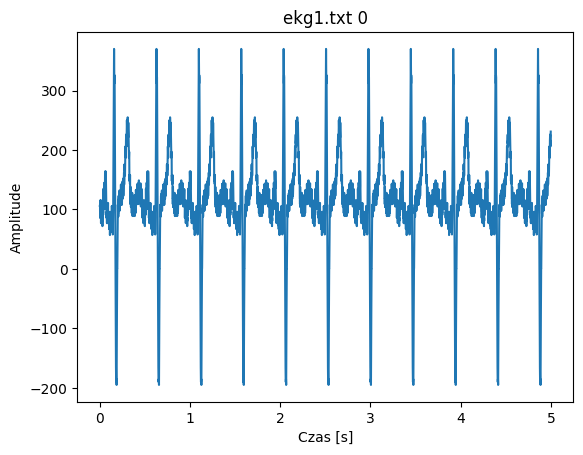

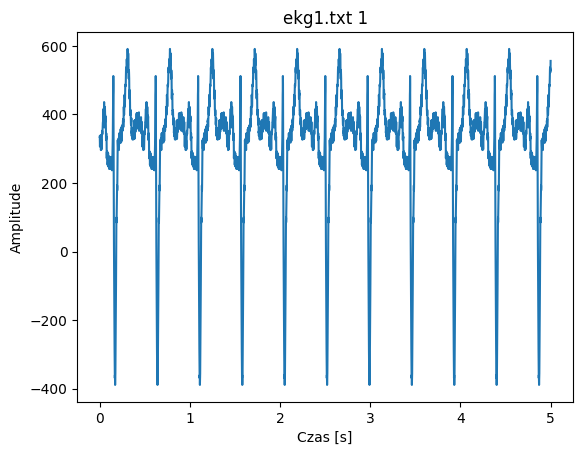

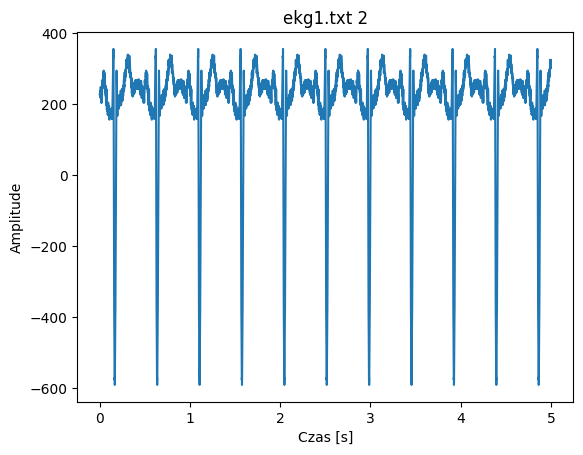

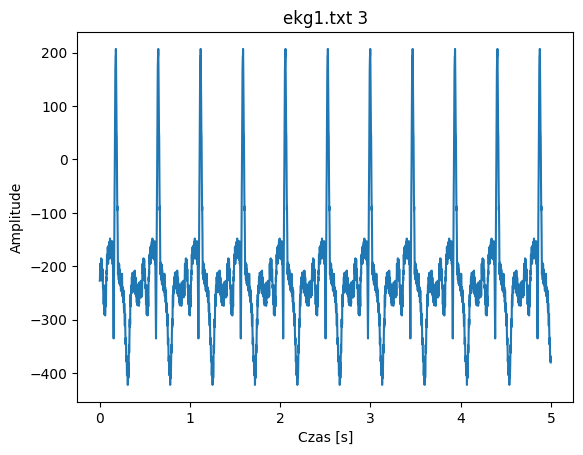

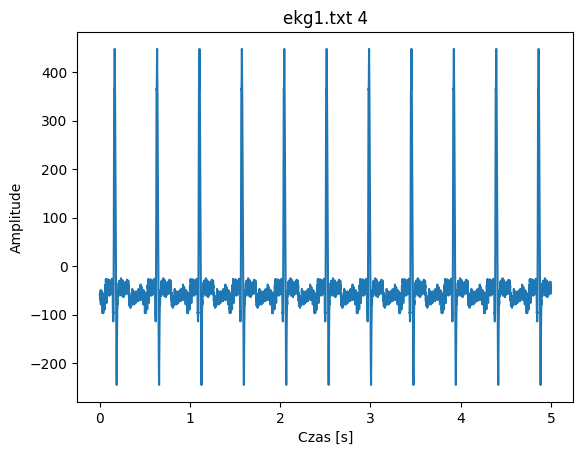

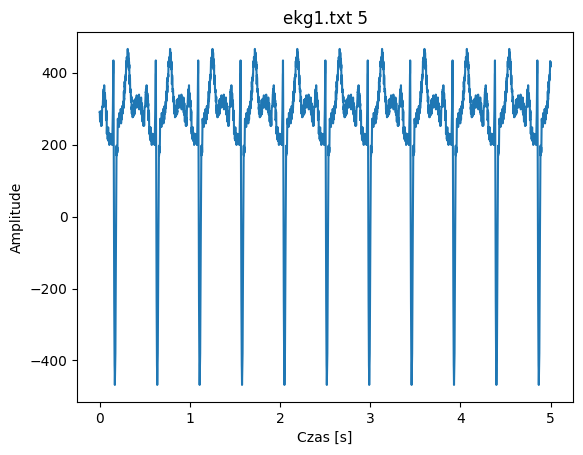

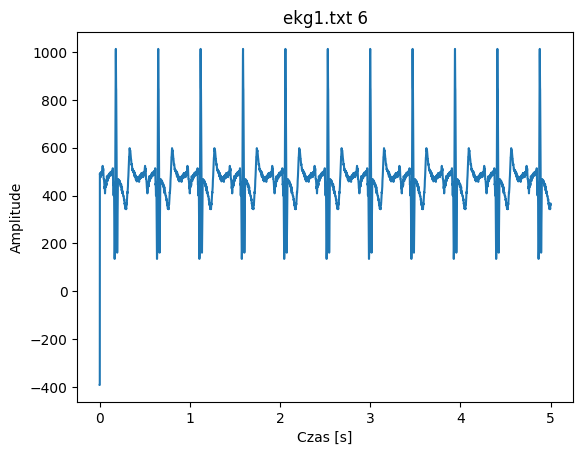

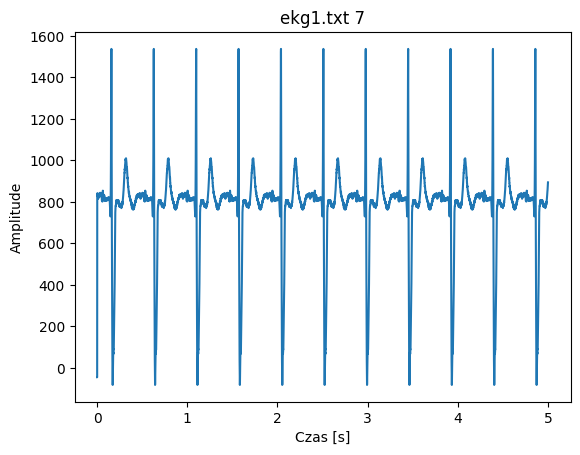

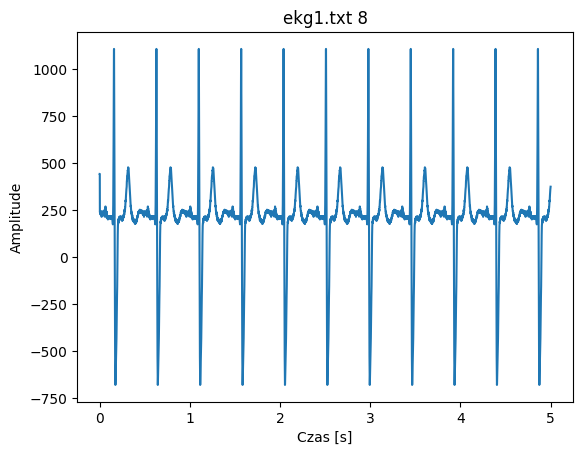

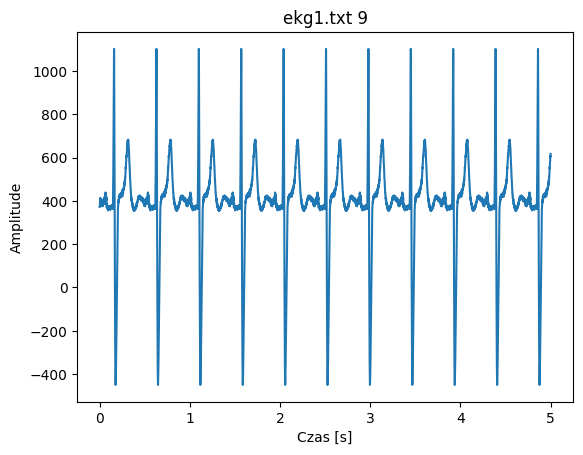

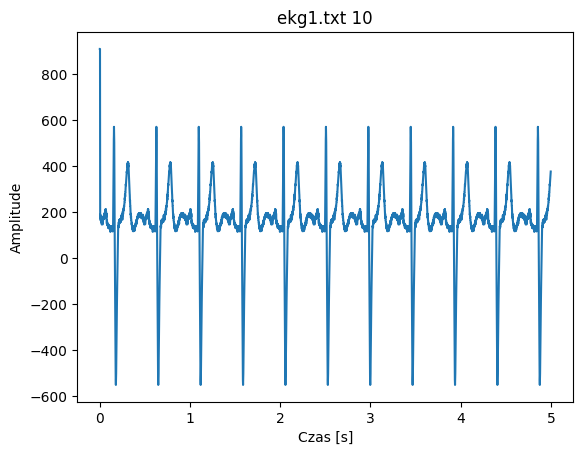

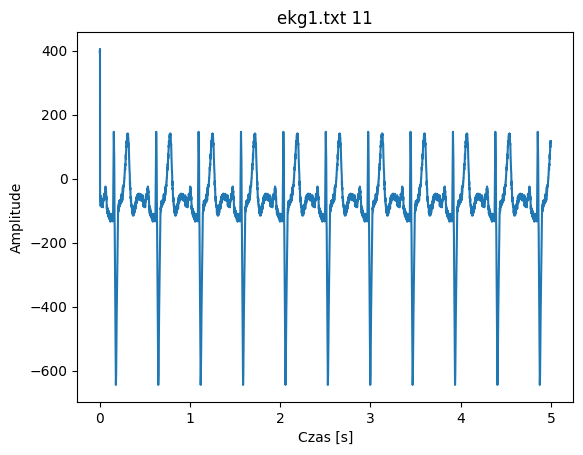

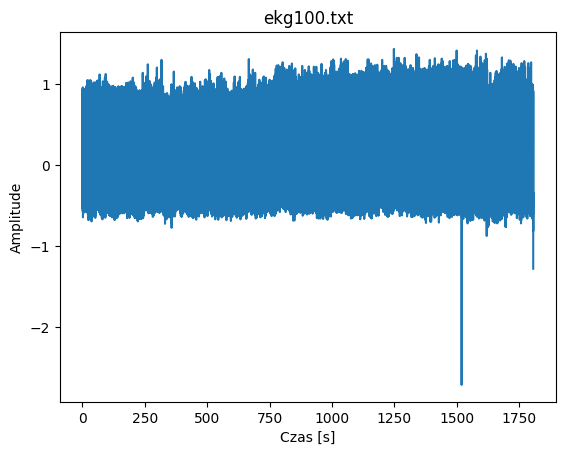

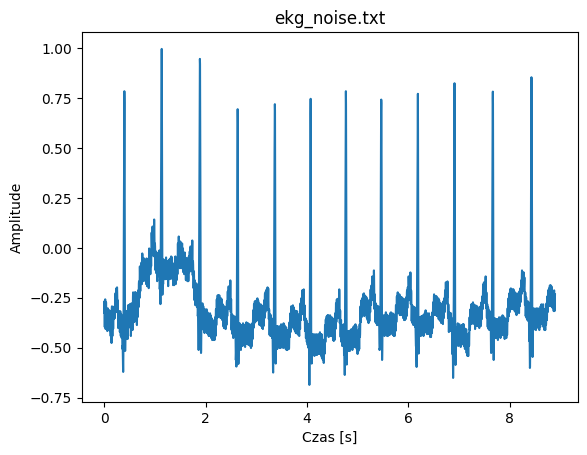

In [1]:

import matplotlib.pyplot as plt
import numpy as np

def cw1(filename, freq): # wczytywanie sygnalu
    file_in = filename

    if filename == 'ekg_noise.txt':
        signal = np.loadtxt(file_in, usecols=1)
        time = np.loadtxt(filename, usecols=0)
    else:
        signal = np.loadtxt(file_in)
        time = np.arange(len(signal)) / freq

    if filename == 'ekg1.txt':
        for i in range(12):
            signal = np.loadtxt(file_in, usecols=i)
            time = np.arange(len(signal)) / freq
            plt.plot(time, signal)
            plt.xlabel('Czas [s]')
            plt.ylabel('Amplitude')
            plt.title(f'{filename} {i}')
            plt.show()
        return


    plt.plot(time, signal)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplitude')
    plt.title(filename)
    plt.show()

    
cw1('ekg1.txt', 1000)
cw1('ekg100.txt', 360)
cw1('ekg_noise.txt', 360)

Poniżej wykres na podstawie pliki 'ekg100.txt'  w przybliżeniu

<img src="ekg100_zoom.png" alt="1000" width="1000">

Pierwsza seria wykresów, których nazwa to 'ekg1.txt i' pochodzi z danych z pliku 'ekg1.txt', w którym to było 12 serii danych, gdzie każda seria odpowiada jednemu wykresowi EKG. 

## Ćwiczenie 2

W tym ćwiczeniu należało zadeklarować dwie sinusoidy o dwóch różnych częstotliwościach, oraz wyliczyć dla nich transformaty Fouriera. W tym celu użyto funkcji `fft` z biblioteki `numpy`.

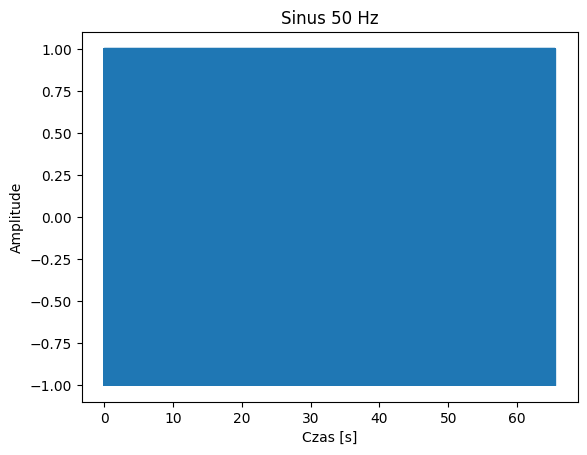

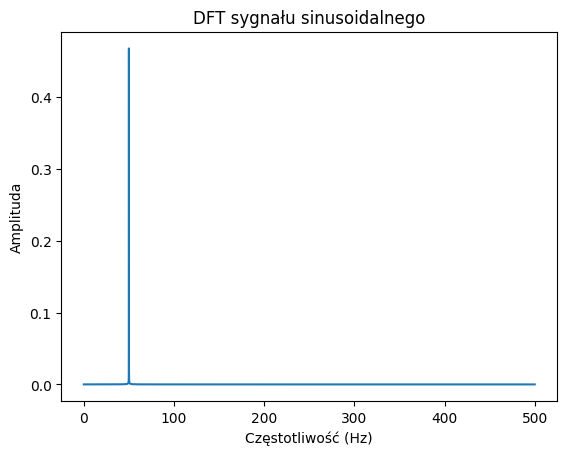

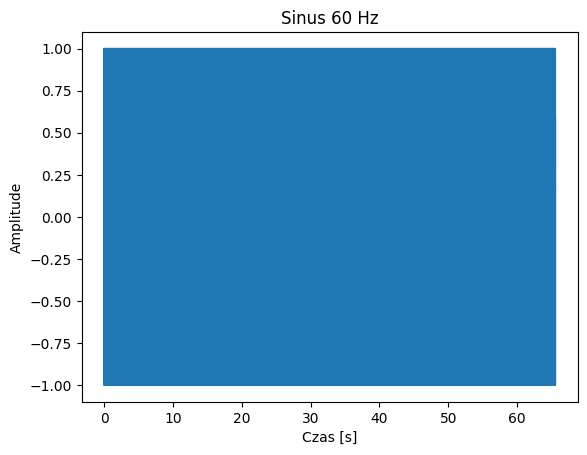

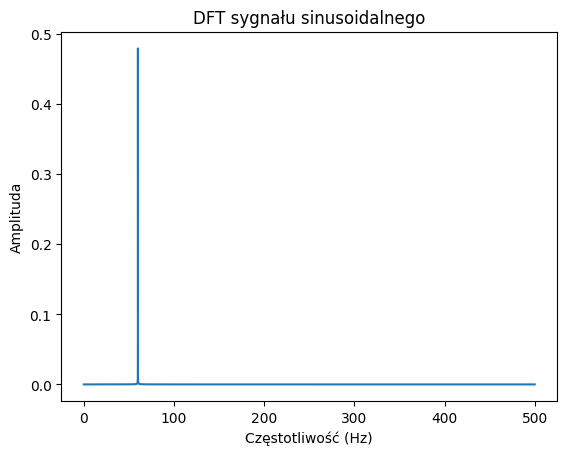

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def cw2(freq): # transformata fouriera
    N = 65536

    Fs = 1000

    time = np.linspace(0, N/Fs, N, endpoint=False)

    signal = np.sin(2*np.pi*freq*time)
        
    plt.plot(time, signal)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplitude')
    plt.title(f'Sinus {freq} Hz')
    plt.show()

    fft_signal = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(N, d=1/Fs)

    mag = np.abs(fft_signal) / N
    mag = mag[:N//2]
    frequencies = frequencies[:N//2]

    # rysowanie wykresu
    plt.plot(frequencies, mag)
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda')
    plt.title('DFT sygnału sinusoidalnego')
    plt.show()

cw2(50)
cw2(60)

Poniżej wykresy obu sinusów w powiększeniu:

<img src="sinus50.png">
<img src="sinus60.png">

## Ćwiczenie 3

W tym ćwiczeniu należało wczytać sygnał z pliku, wykonać transformatę Fouriera, a następnie wykonać odwrotną transformatę Fouriera. Do wyliczenia odwrotnej transformaty Fouriera użyto funkcju `ifft` z biblioteki `numpy`.

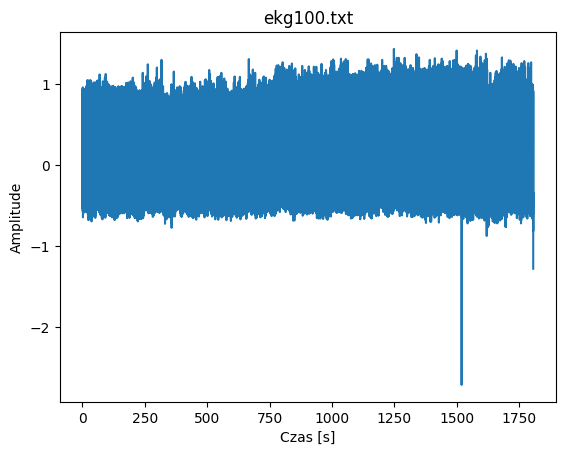

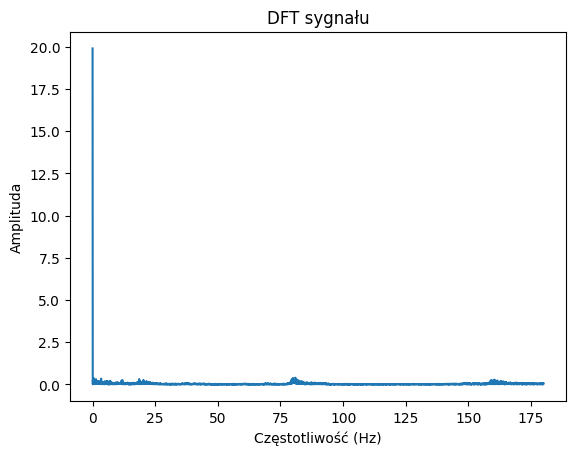

c:\Users\z004rsdv\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


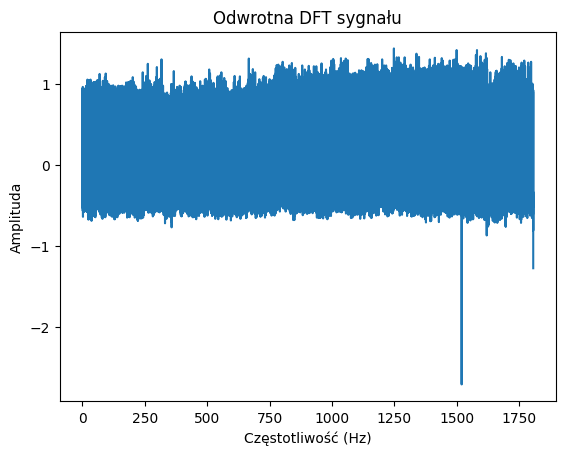

In [3]:
def cw3(): # odwrotna transformata fouriera
    freq = 360
    filename = "ekg100.txt"
    signal = np.loadtxt(filename)
    time = np.arange(len(signal)) / freq

    # fig, (a1, a2, a3) = plt.subplots(3, 1)

    plt.plot(time, signal)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplitude')
    plt.title(filename)
    plt.show()

    Fs = freq
    N = 10000
    fft_signal = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(N, d=1/Fs)

    mag = np.abs(fft_signal) / N
    mag = mag[:N//2]
    frequencies = frequencies[:N//2]

    plt.plot(frequencies, mag)
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda')
    plt.title('DFT sygnału')
    plt.show()

    signal_rec = np.fft.ifft(fft_signal)

    plt.plot(time, signal_rec)
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda')
    plt.title('Odwrotna DFT sygnału')
    plt.show()

cw3()

## Ćwiczenie 4
W tym zadaniu należało zaimplementować filtr w celu wyeliminowania zakłóceń w sygnale. W programie zastosowano filtr Czebyszewa. W tym celu wykorzystano bibliotekę `scipy`.

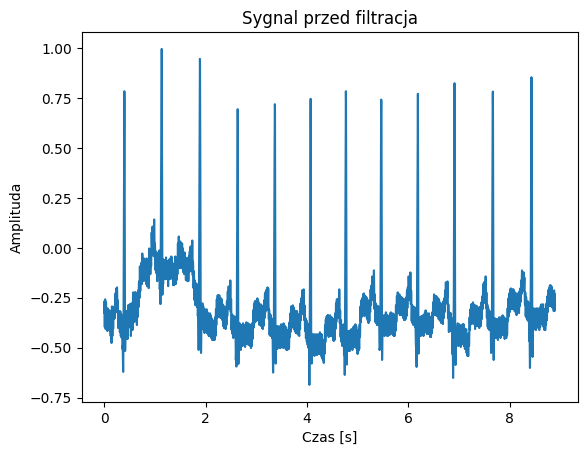

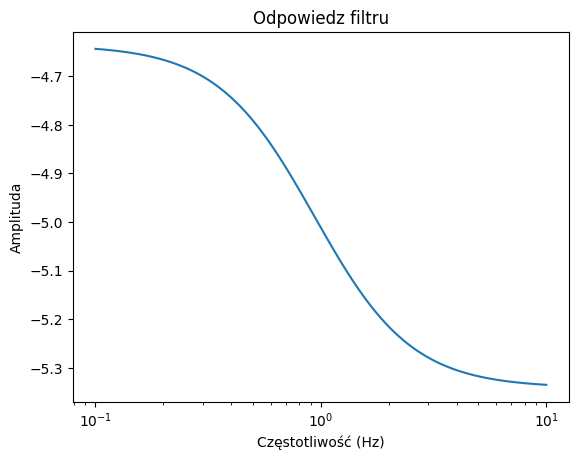

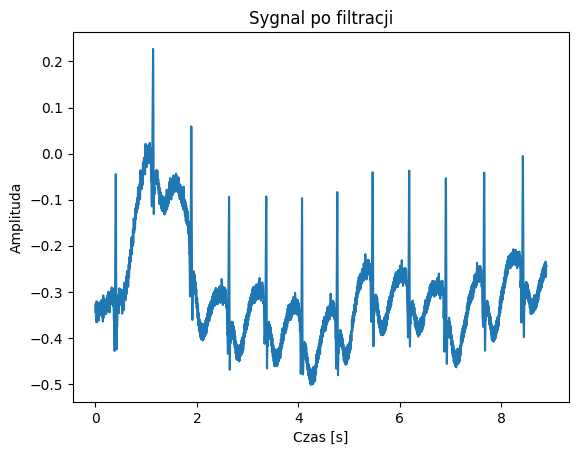

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

def cw4():
    freq = 360
    filename = "ekg_noise.txt"
    
    sig = np.loadtxt(filename, usecols=1)
    time = np.loadtxt(filename, usecols=0)

    plt.plot(time, sig)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.title('Sygnal przed filtracja')
    plt.show()

    b, a = signal.cheby2(4, 5, 0.01, 'low', analog=False)
    w, h = signal.freqs(b, a)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.xlabel('Częstotliwość (Hz)')
    plt.ylabel('Amplituda')
    plt.title('Odpowiedz filtru')
    plt.show()

    filtered_sig = signal.filtfilt(b, a, sig)
    plt.plot(time, filtered_sig)
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.title('Sygnal po filtracji')
    plt.show()

cw4()